In [1]:
from features import process_simulation, create_args, sample_and_save
# from . import select
from select_points import select_most_unique_samples as select_most_unique_samples
import matplotlib.pyplot as plt
import numpy as np

/home/ericb/mmml/.venv/lib/python3.12/site-packages/dscribe/core/system.py:182: SyntaxWarning: invalid escape sequence '\l'
  """Calculates the distance matrix A defined as:
/home/ericb/mmml/.venv/lib/python3.12/site-packages/dscribe/core/system.py:224: SyntaxWarning: invalid escape sequence '\l'
  """Calculates the inverse distance matrix A defined as:
/home/ericb/mmml/.venv/lib/python3.12/site-packages/dscribe/descriptors/acsf.py:49: SyntaxWarning: invalid escape sequence '\e'
  """
/home/ericb/mmml/.venv/lib/python3.12/site-packages/dscribe/descriptors/mbtr.py:148: SyntaxWarning: invalid escape sequence '\l'
  """
/home/ericb/mmml/.venv/lib/python3.12/site-packages/dscribe/descriptors/lmbtr.py:70: SyntaxWarning: invalid escape sequence '\l'
  """
/home/ericb/mmml/.venv/lib/python3.12/site-packages/dscribe/descriptors/lmbtr.py:492: SyntaxWarning: invalid escape sequence '\s'
  """Used to inquire the final number of features that this descriptor
/home/ericb/mmml/.venv/lib/python3.12/s

In [2]:
100000 // 1000

100

In [4]:
from pathlib import Path

ressim = Path("/pchem-data/meuwly/boittier/home/ressim")

logs = list(ressim.glob("*/*/log/equilibration_1_*"))
logs

[]

In [4]:
logfile = logs[0]
psf_file = logfile.parents[1] / "system.psf"
dcd_file = list((logfile.parents[1] / "dcd" ).glob("eq*_1_*dcd")).pop()
pdb_file = logfile.parents[1] / "pdb" / "initial.pdb"
resid = "aceh"
args = create_args(logfile=logfile,
                   psf=psf_file, 
                   dcd=dcd_file,
                   pdb=pdb_file, 
                   start=0, end=1000, samples_per_frame=3, stride=1, 
                   resid=resid)
print((args))

Namespace(logfile=PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/sim_t_298.15_k_rho_1043.9_kgperm3_pNone_kPa/log/equilibration_1_20250317_203756.log'), psf=PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/sim_t_298.15_k_rho_1043.9_kgperm3_pNone_kPa/system.psf'), dcd=PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/sim_t_298.15_k_rho_1043.9_kgperm3_pNone_kPa/dcd/equilibration_1_20250317_203756.dcd'), pdb=PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/sim_t_298.15_k_rho_1043.9_kgperm3_pNone_kPa/pdb/initial.pdb'), start=0, end=1000, stride=1, resid='aceh', sim_conds=None, samples_per_frame=3, n_find=6)


In [5]:
u, labels, natoms, output_path, results = process_simulation(args)

Processing: aceh None


/pchem-data/meuwly/boittier/home/pycharmm_test/.venv/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/pchem-data/meuwly/boittier/home/pycharmm_test/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


****************************************************************************************************
start 0
end 1000
stride 1
universe.trajectory 100000
trajectory_frames 1000
****************************************************************************************************


0it [00:00, ?it/s]/pchem-data/meuwly/boittier/home/pycharmm_test/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/pchem-data/meuwly/boittier/home/pycharmm_test/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/pchem-data/meuwly/boittier/home/pycharmm_test/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/pchem-data/meuwly/boittier/home/pycharmm_test/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Fo

In [6]:
dir(u.trajectory[0])
u.trajectory[0].volume**(1/3)

34.35231399536132

In [7]:
output_path

PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043')

In [8]:
npz_path = sample_and_save(results, output_path)
npz_path

PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/test.npz')

In [10]:
data = np.load(npz_path)
data.keys()

KeysView(NpzFile '/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/test.npz' with keys: numbers, positions, occupancy, bfactor, residuenames...)

In [13]:
data["positions"].shape

(2917, 48, 3)

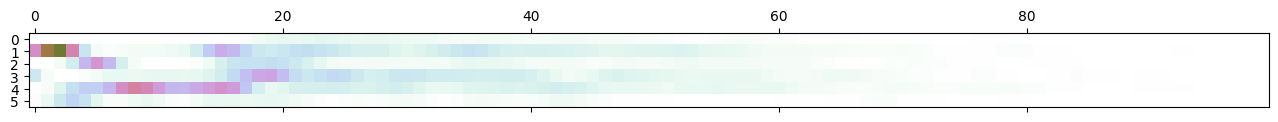

In [260]:
m = results["all_descriptors_full"][0]

plt.matshow(m, vmin=0, vmax=.5, cmap="cubehelix_r")
plt.show()
    

30

In [262]:
samples

[4,
 29,
 6,
 10,
 16,
 18,
 5,
 25,
 26,
 15,
 8,
 14,
 3,
 20,
 1,
 28,
 2,
 22,
 7,
 17,
 27,
 24,
 12,
 13]

In [263]:
"vmd -f " + " -f ".join([str(_) for i, _ in enumerate(results["all_pdb_filenames"]) if i in samples])

'vmd -f /pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/0_167_1.pdb -f /pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/0_409_2.pdb -f /pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/1_243_0.pdb -f /pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/1_179_1.pdb -f /pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/1_115_2.pdb -f /pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/2_326_0.pdb -f /pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/2_135_1.pdb -f /pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/2_114_2.pdb -f /pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/3_41_1.pdb -f /pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/4_163_0.pdb -f /pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_

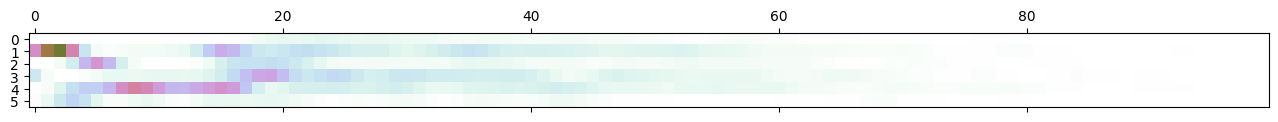

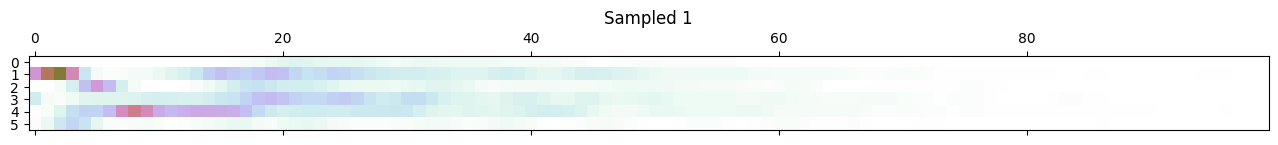

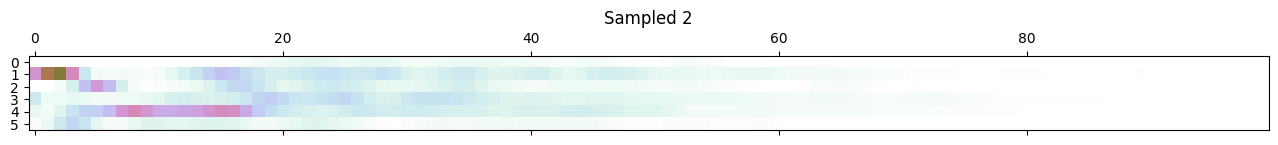

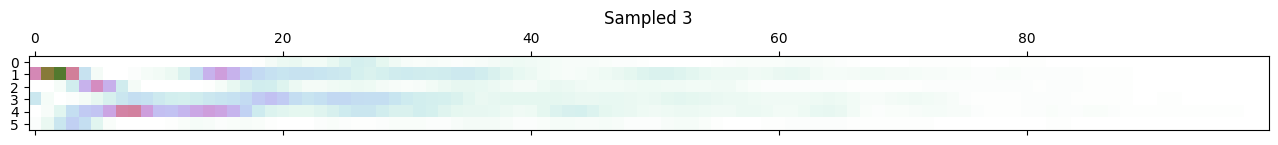

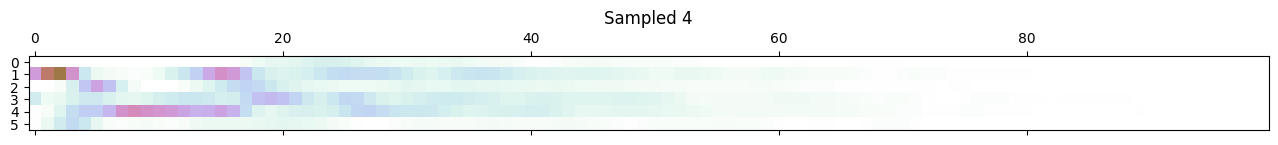

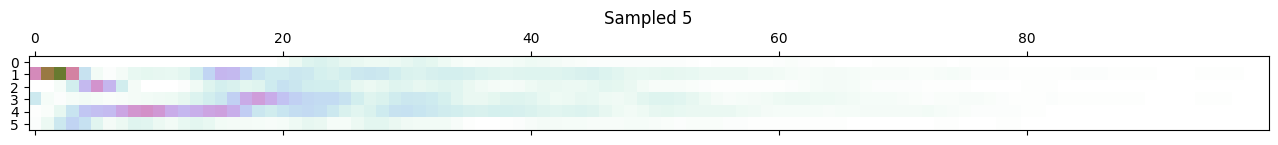

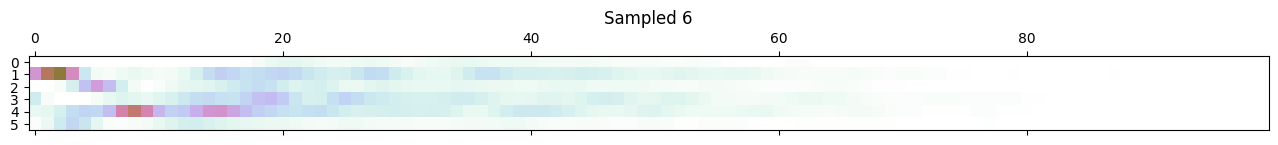

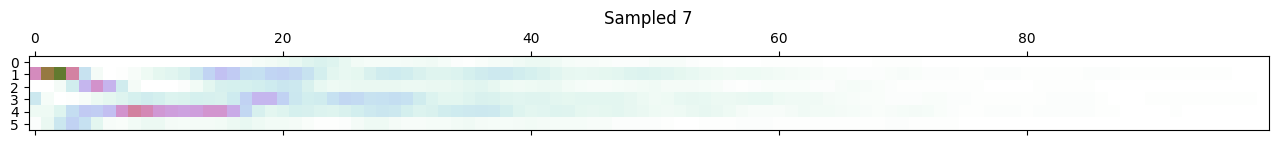

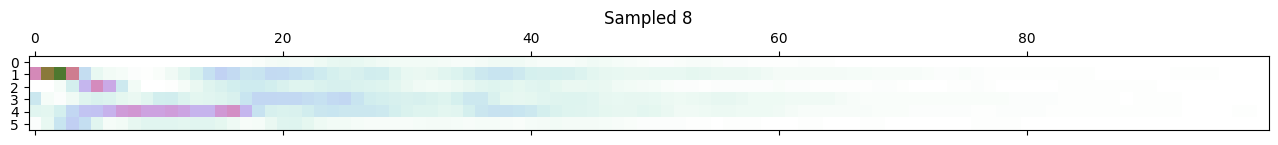

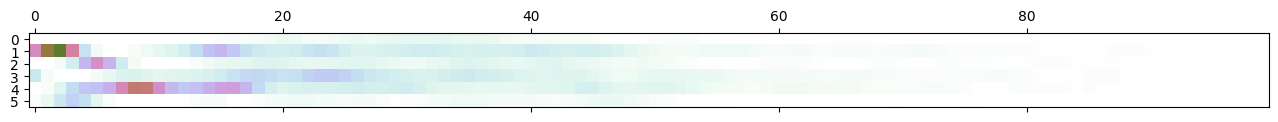

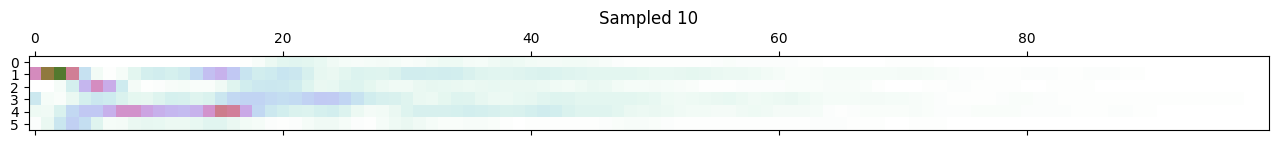

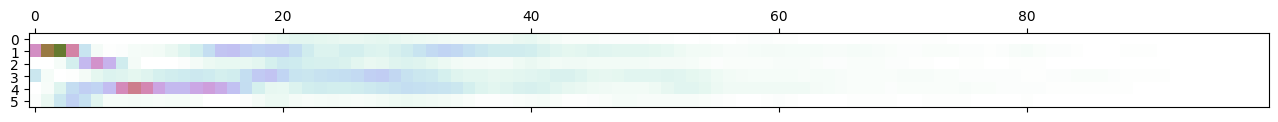

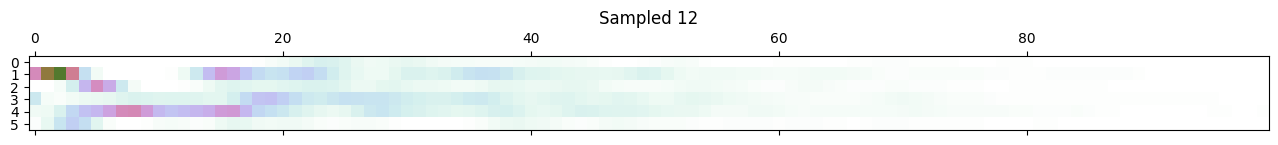

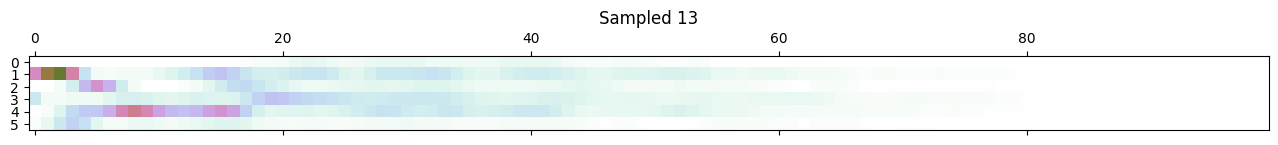

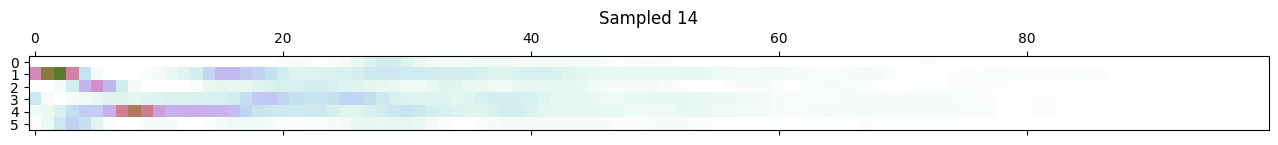

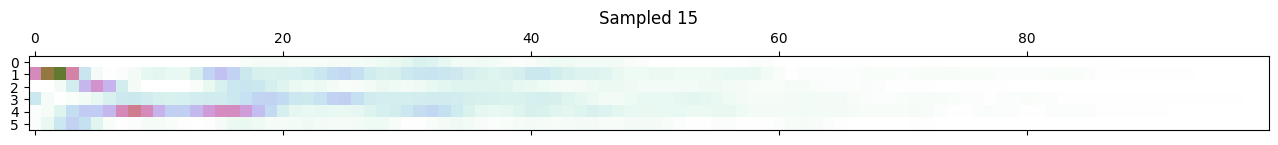

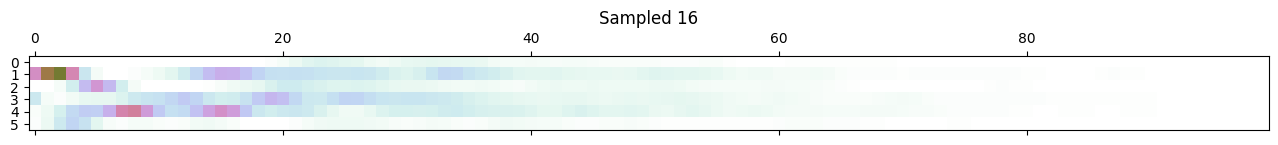

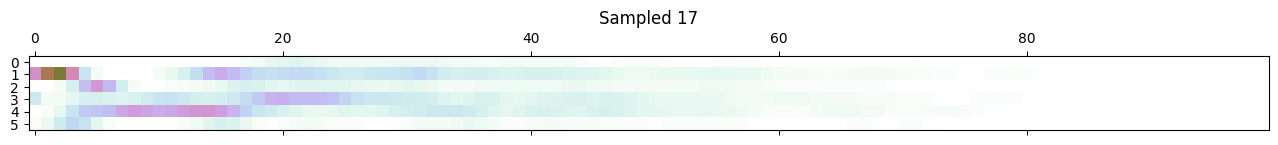

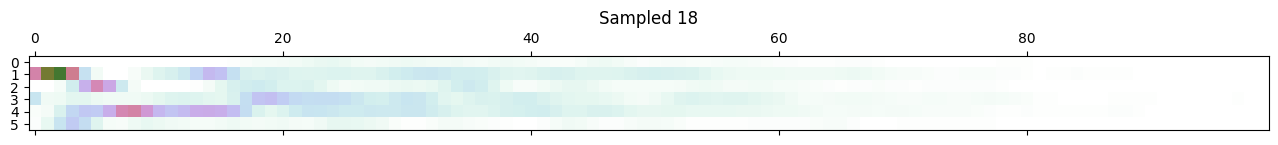

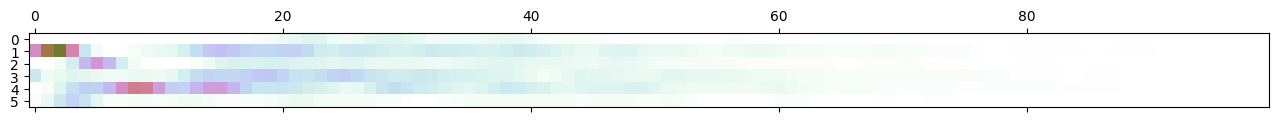

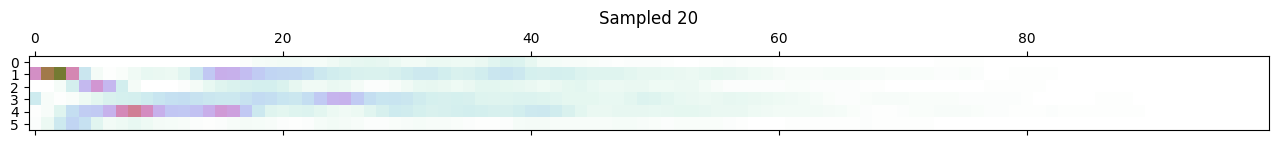

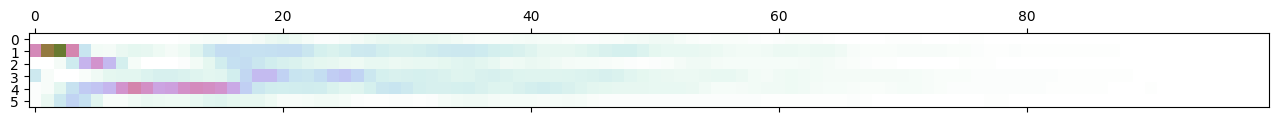

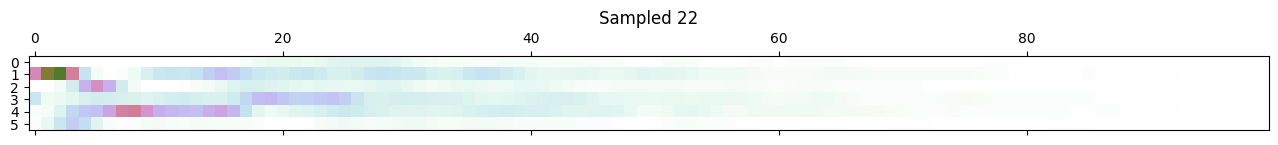

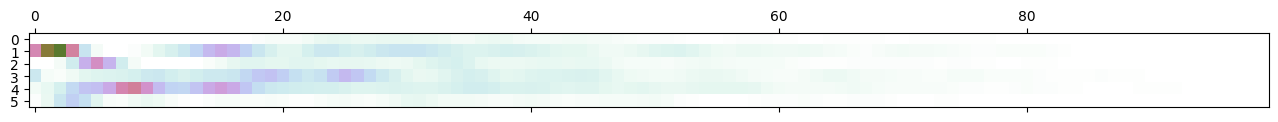

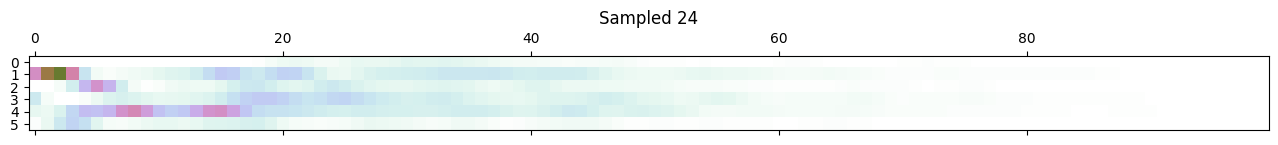

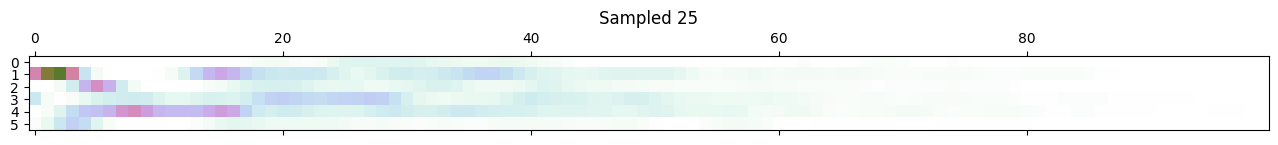

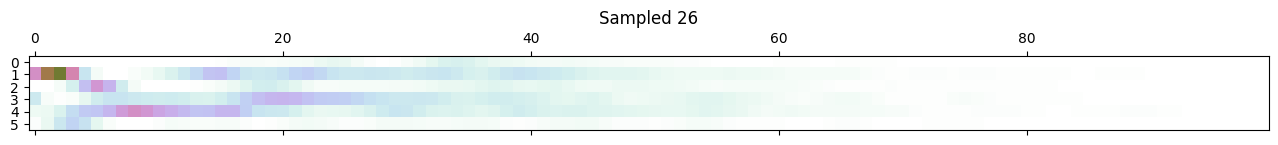

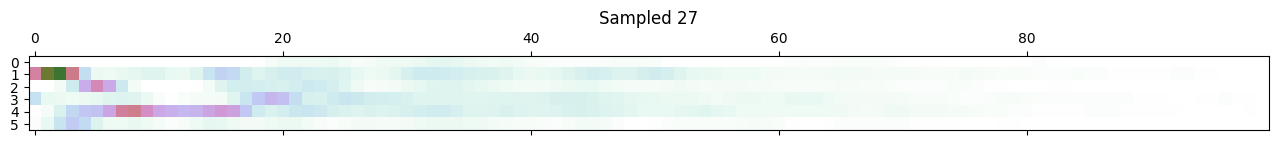

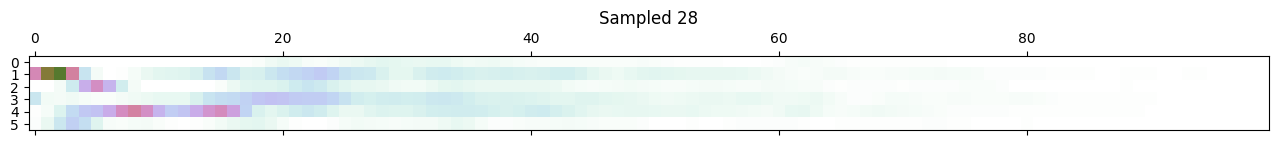

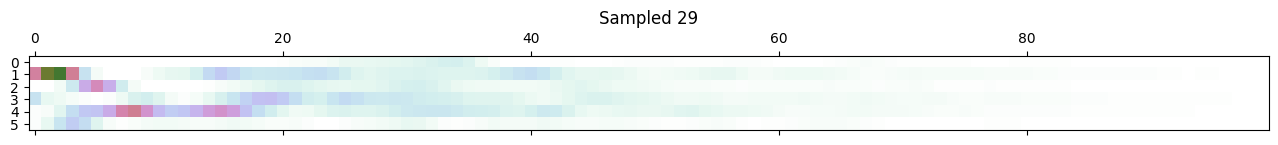

In [264]:
for i, m in enumerate(results["all_descriptors_full"]):


    plt.matshow(m, vmin=0, vmax=.5, cmap="cubehelix_r")

    if i in samples:
        plt.title(f"Sampled {i}")
    
    plt.show()

In [265]:
# hash(results["all_descriptors"][0])

In [266]:
import ase.io as ase_io
from ase.visualize import view
i = 10

results["all_pdb_filenames"]

[PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/0_264_0.pdb'),
 PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/0_167_1.pdb'),
 PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/0_409_2.pdb'),
 PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/1_243_0.pdb'),
 PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/1_179_1.pdb'),
 PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/1_115_2.pdb'),
 PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/2_326_0.pdb'),
 PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/2_135_1.pdb'),
 PosixPath('/pchem-data/meuwly/boittier/home/ressim/aceh/data/sim_t_298.15_k_rho_1043/pdb/2_114_2.pdb'),
 PosixPath('/pchem-data/meuwly/boittier/home/ressim/ace

In [268]:
i = 1
pdb_fn = results["all_pdb_filenames"][i]
a = load_ase_and_fix_atoms(pdb_fn)
view(a, viewer="x3d")

In [269]:
i = 22
pdb_fn = results["all_pdb_filenames"][i]
a = load_ase_and_fix_atoms(pdb_fn)
view(a, viewer="x3d")

In [270]:
samples

[4,
 29,
 6,
 10,
 16,
 18,
 5,
 25,
 26,
 15,
 8,
 14,
 3,
 20,
 1,
 28,
 2,
 22,
 7,
 17,
 27,
 24,
 12,
 13]

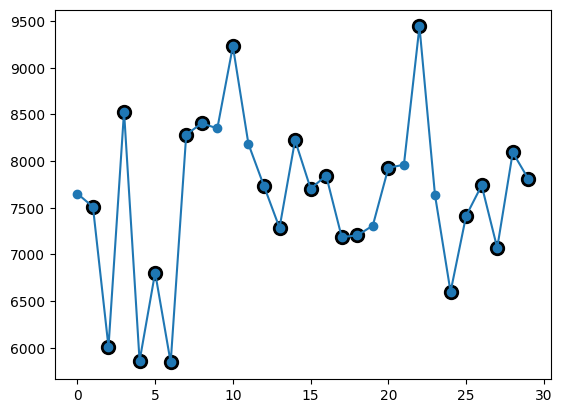

In [272]:
# a.set_positions(a2.get_positions())
moments_of_inertia  = [a.get_moments_of_inertia() for a in ase_atoms]
r_mI = [np.linalg.norm(_) for _ in moments_of_inertia]
plt.plot(r_mI, "-o")
for i in samples:
    plt.scatter(i, r_mI[i], color="k", s=100)

In [273]:
view(ase_atoms[0], viewer="x3d")

In [274]:
view(ase_atoms[1], viewer="x3d")

In [294]:
np.load("test.npz")

NpzFile 'test.npz' with keys: numbers, positions, occupancy, bfactor, residuenames...

In [295]:
data.keys()

dict_keys(['numbers', 'positions', 'occupancy', 'bfactor', 'residuenames', 'atomtypes', 'residuenumbers', 'cell', 'pbc', 'pdb_fn', 'desc_mbtr', 'train'])